A SHORT DESCRIPTION OF THE FEATURES.

datetime - hourly date + timestamp

season - 1 = spring, 2 = summer, 3 = fall, 4 = winter

holiday - whether the day is considered a holiday

workingday - whether the day is neither a weekend nor holiday

weather -

1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp - temperature in Celsius

atemp - "feels like" temperature in Celsius

humidity - relative humidity

windspeed - wind speed

casual - number of non-registered user rentals initiated

registered - number of registered user rentals initiated

count - number of total rentals

In [1]:
# data analysis stack
import numpy as np
import pandas as pd
import missingno as msno

# data visualization stack
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(11.7,8.27)})

# data pre-processing stack
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# machine learning stack
#from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,AdaBoostRegressor

# additional pakages from sklearn for adding more terms to the equation
from sklearn.preprocessing import PolynomialFeatures

#for hyperparasearch
from sklearn.model_selection import GridSearchCV

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression

# miscellaneous
import time
import warnings
import scipy.stats as ss
warnings.filterwarnings("ignore")
warnings.filterwarnings('always')

# **Read data**

In [2]:

bike = pd.read_csv("../week03/data/train.csv")
test_kag = pd.read_csv("../week03/data/test.csv")
bike

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [3]:
#Duplicating the datasets
df_bike=bike.copy()
df_bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
df_test_kag=test_kag.copy()
df_test_kag.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [5]:
df_bike.columns.unique()

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

HERE ALL THE VARIABLES OR FEATURES ARE NUMERIC AND THE TARGET VARIABLE THAT WE HAVE TO PREDICT IS THE count VARIABLE. HENCE THIS IS A TYPICAL EXAMPLE OF A REGRESSION PROBLEM AS THE count VARIABLE IS CONTINUOUS VARIED.

In [6]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [7]:
df_bike.isnull().sum() # implies no null values and hence no imputation needed.

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

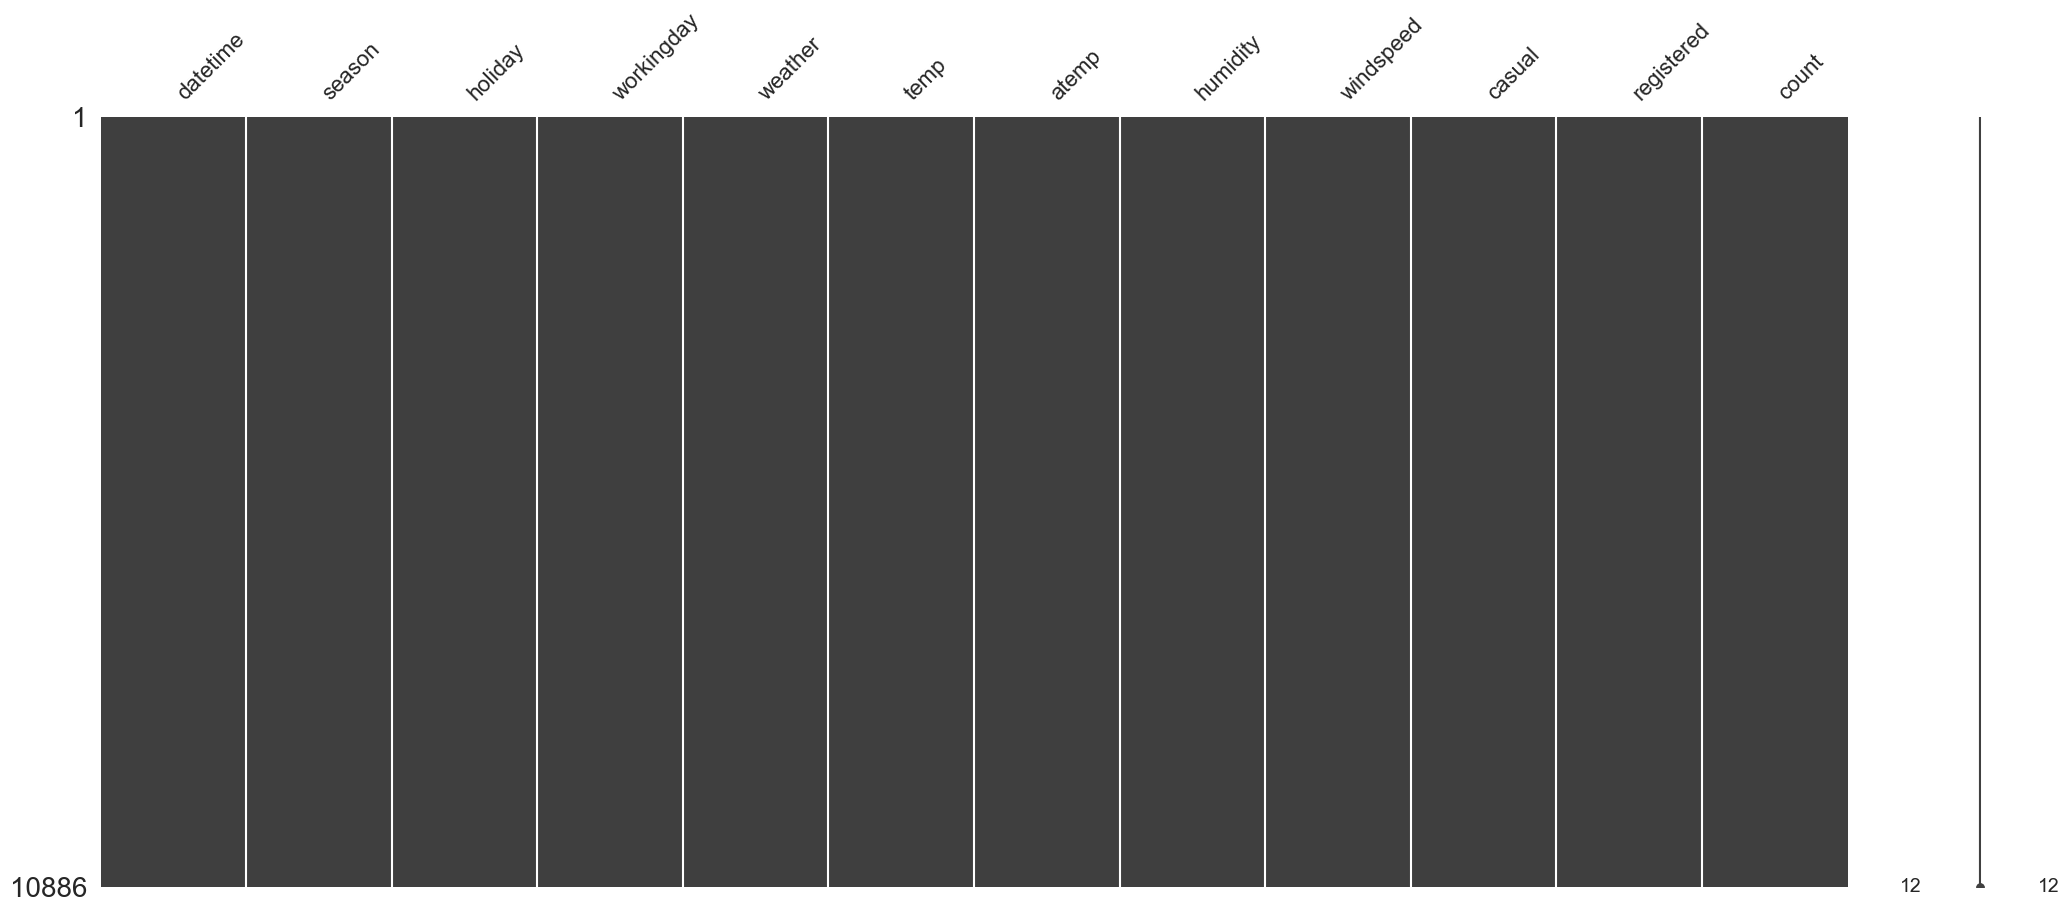

In [8]:
msno.matrix(df_bike); # just to visualize. no missing value

In [9]:
df_bike.season.value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

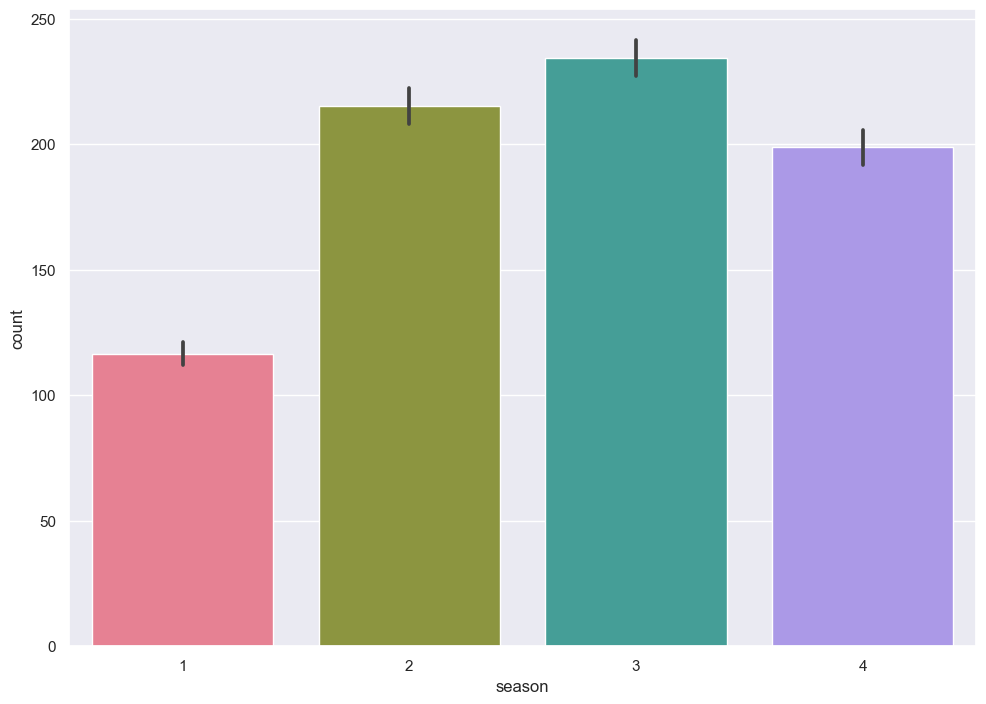

In [10]:
sns.barplot(
          x='season',
          y='count',
          data=df_bike,
          palette='husl');

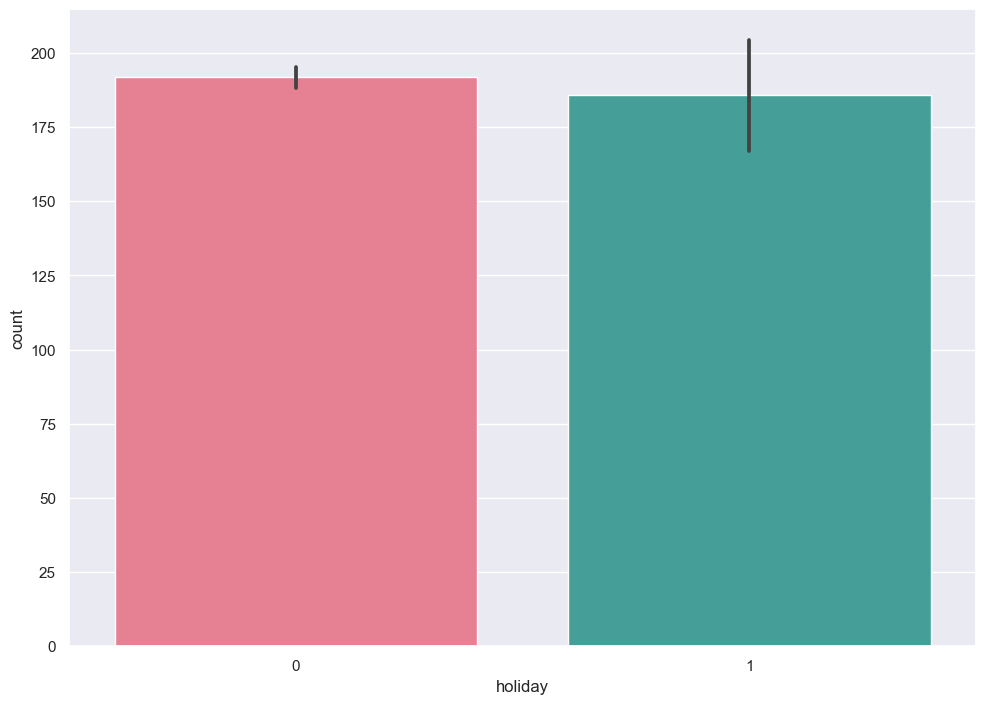

In [11]:
df_bike.holiday.value_counts()
sns.barplot(
          x='holiday',
          y='count',
          data=df_bike,
          palette='husl');

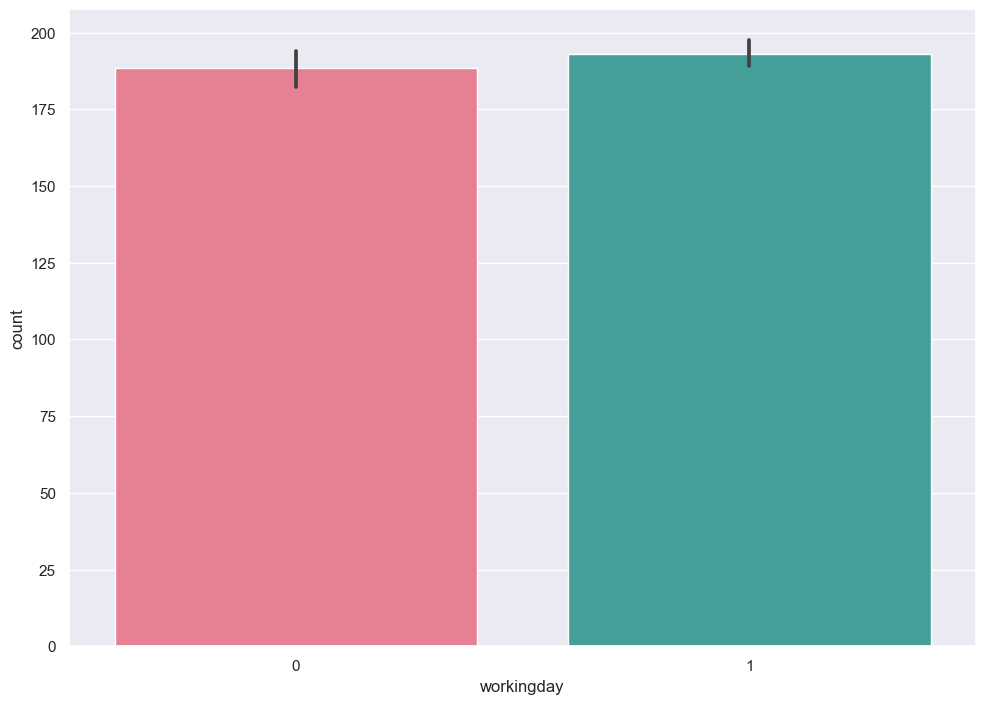

In [12]:
df_bike.workingday.value_counts()
sns.barplot(
          x='workingday',
          y='count',
          data=df_bike,
          palette='husl');

In [13]:
df_bike.weather.value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

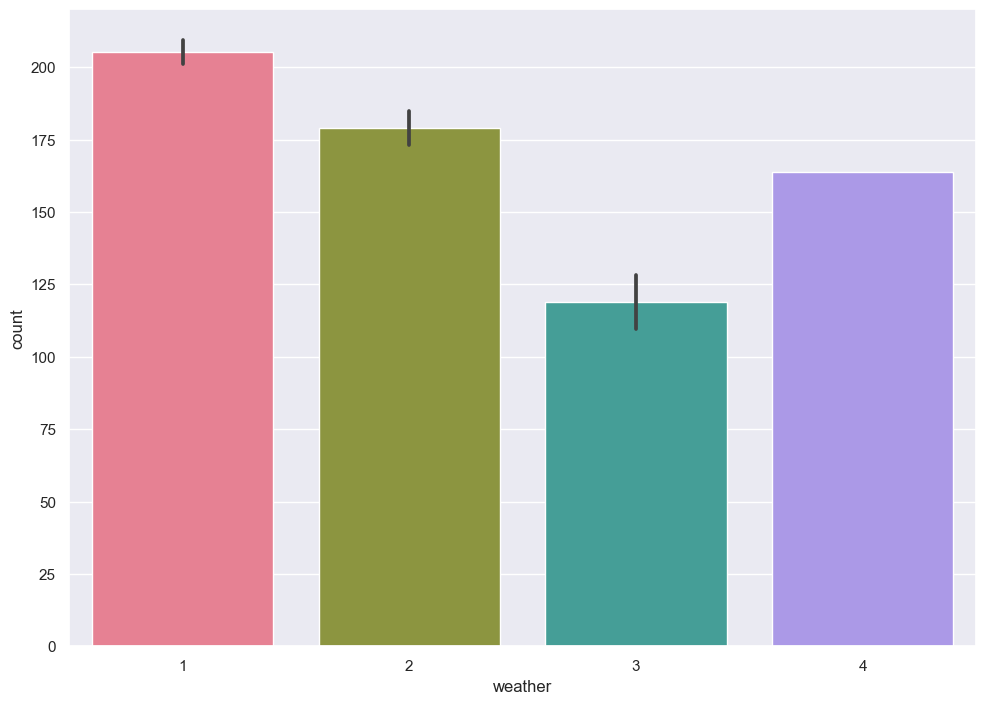

In [14]:
sns.barplot(
          x='weather',
          y='count',
          data=df_bike,
          palette='husl'
);
# 1-> spring
# 2-> summer
# 3-> fall
# 4-> winter

NOW WE CAN ALSO SEE DISTRIBUTION OF CONTINOUS VARIABLES.

In [15]:
df_bike.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


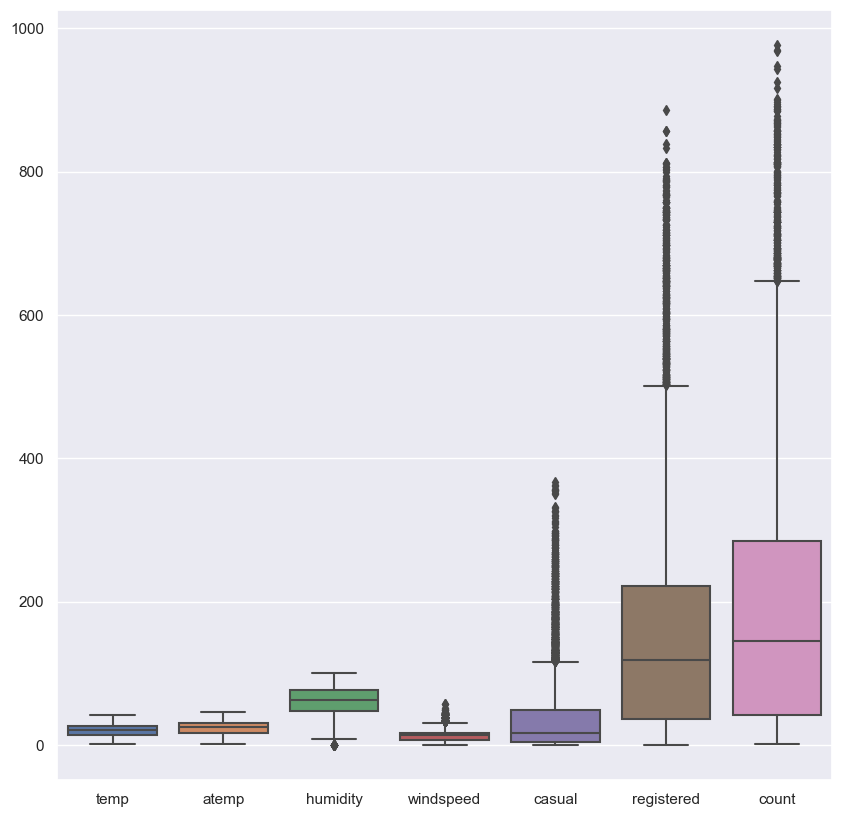

In [16]:
# just to visualize.
sns.boxplot(data=df_bike[['temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']])
fig=plt.gcf()
fig.set_size_inches(10,10)

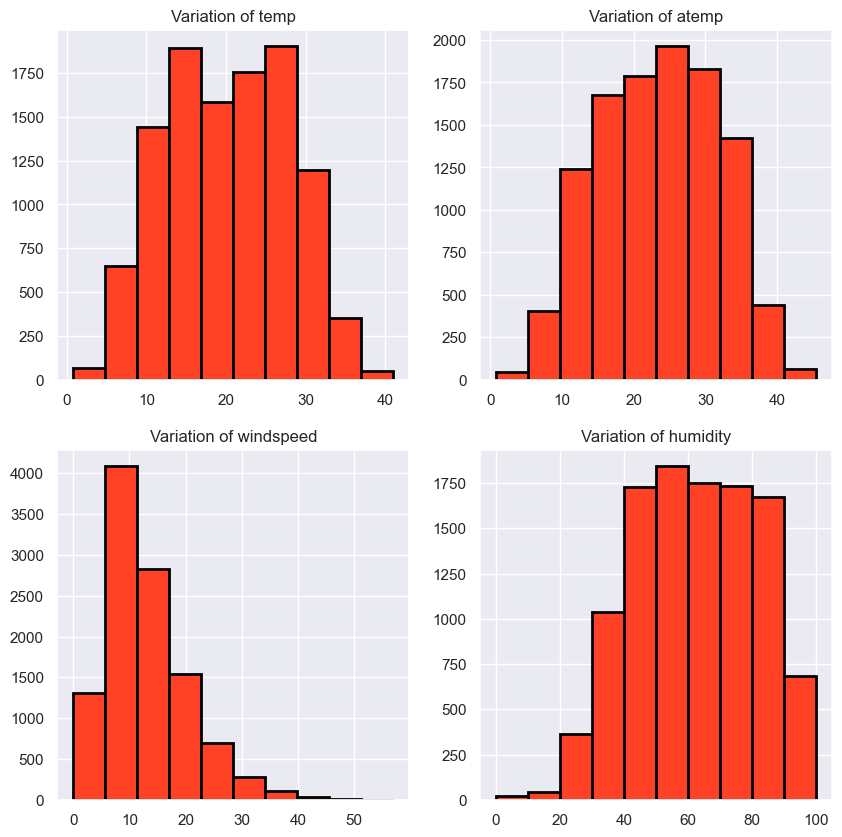

In [17]:
# can also be visulaized using histograms for all the continuous variables.
df_bike.temp.unique()
fig,axes=plt.subplots(2,2)
axes[0,0].hist(
          x="temp",
          data=df_bike,
          edgecolor="black",
          linewidth=2,
          color='#ff4125'
)
axes[0,0].set_title("Variation of temp")

axes[0,1].hist(
          x="atemp",
          data=df_bike,
          edgecolor="black",
          linewidth=2,
          color='#ff4125'
)
axes[0,1].set_title("Variation of atemp")

axes[1,0].hist(
          x="windspeed",
          data=df_bike,
          edgecolor="black",
          linewidth=2,
          color='#ff4125'
)
axes[1,0].set_title("Variation of windspeed")

axes[1,1].hist(
          x="humidity",
          data=df_bike,
          edgecolor="black",
          linewidth=2,
          color='#ff4125'
)
axes[1,1].set_title("Variation of humidity")
fig.set_size_inches(10,10)

NOW AFTER SEEING THE DISTRIBUTION OF VARIOUS DISCRETE AS WELL AS CONTINUOUS VARIABLES WE CAN SEE THE INTERREALTION B/W THEM USING A HEAT MAP

/var/folders/ch/f6wpk76d1z90hnjk7lhgsmgc0000gp/T/ipykernel_58297/503329441.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_mat= df_bike[:].corr()


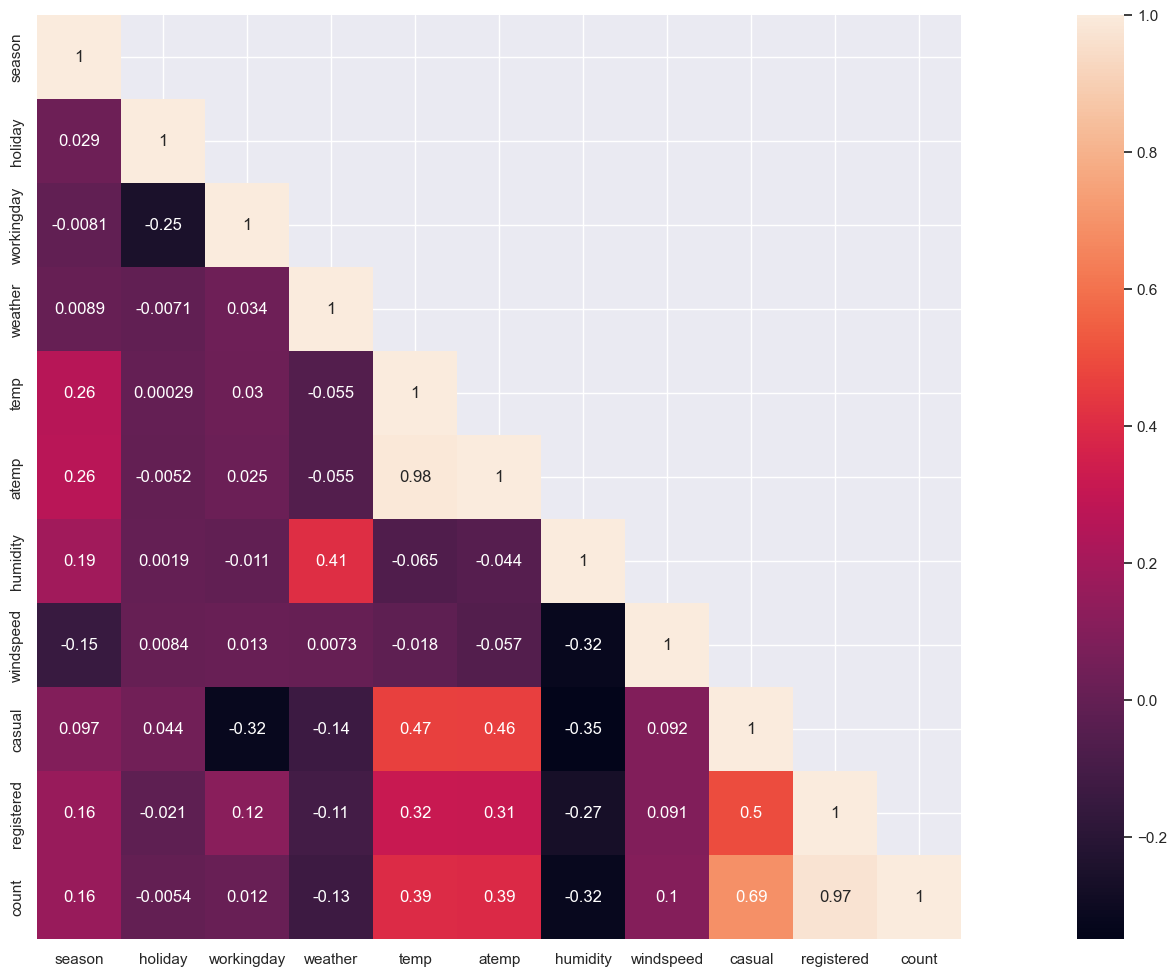

In [18]:
#corelation matrix.
cor_mat= df_bike[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(
          data=cor_mat,
          mask=mask,
          square=True,
          annot=True,
          cbar=True
);

INFERENCES FROM THE ABOVE HEATMAP--

self realtion i.e. of a feature to itself is equal to 1 as expected.

temp and atemp are highly related as expected.

humidity is inversely related to count as expected as the weather is humid people will not like to travel on a bike.

also note that casual and working day are highly inversely related as you would expect.

Also note that count and holiday are highly inversely related as you would expect.

Also note that temp(or atemp) highly effects the count.

Also note that weather and count are highly inversely related. This is bcoz for uour data as weather increases from (1 to 4) implies that weather is getting more worse and so lesser people will rent bikes.

registered/casual and count are highly related which indicates that most of the bikes that are rented are registered.

similarly we can draw some more inferences like weather and humidity and so on... .

NOW WE CAN DO SOME FEATURE ENGINEERING AND GET SOME NEW FEATURES AND DROP SOME USELESS OR LESS RELEVANT FEATURES.

In [19]:
# # seperating season as per values. this is bcoz this will enhance features.
season=pd.get_dummies(df_bike['season'],prefix='season')
df_bike=pd.concat([df_bike,season],axis=1)
df_bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,season_1,season_2,season_3,season_4
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,0,0,0


In [20]:
season=pd.get_dummies(df_test_kag['season'],prefix='season')
df_test_kag=pd.concat([df_test_kag,season],axis=1)
df_test_kag.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,1,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,0,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,0,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,0,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,0,0,0


In [21]:
#same for weather. this is bcoz this will enhance features.
weather=pd.get_dummies(df_bike['weather'],prefix='weather')
df_bike=pd.concat([df_bike,weather],axis=1)
df_bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0,0,0,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,0,0,0,1,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,0,0,0,1,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,0,0,0,1,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,0,0,0,1,0,0,0


In [22]:
weather=pd.get_dummies(df_test_kag['weather'],prefix='weather')
df_test_kag=pd.concat([df_test_kag,weather],axis=1)
df_test_kag.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,1,0,0,0,1,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0


In [23]:
#now can drop weather and season.
df_bike.drop(['season','weather'],inplace=True,axis=1)
df_bike.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0,3,13,16,1,0,0,0,1,0,0,0
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0,8,32,40,1,0,0,0,1,0,0,0
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0,5,27,32,1,0,0,0,1,0,0,0
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0,3,10,13,1,0,0,0,1,0,0,0
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0,0,1,1,1,0,0,0,1,0,0,0


In [24]:
df_test_kag.drop(['season','weather'],inplace=True,axis=1)
df_test_kag.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-20 00:00:00,0,1,10.66,11.365,56,26.0027,1,0,0,0,1,0,0,0
1,2011-01-20 01:00:00,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0
2,2011-01-20 02:00:00,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0
3,2011-01-20 03:00:00,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0
4,2011-01-20 04:00:00,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0


now most importantly split the date and time as the time of day is expected to effect the no of bikes. for eg at office hours like early mornning or evening one would expect a greater demand of rental bikes

In [25]:
df_bike["hour"] = [t.hour for t in pd.DatetimeIndex(df_bike.datetime)]
df_bike["day"] = [t.dayofweek for t in pd.DatetimeIndex(df_bike.datetime)]
df_bike["month"] = [t.month for t in pd.DatetimeIndex(df_bike.datetime)]
df_bike['year'] = [t.year for t in pd.DatetimeIndex(df_bike.datetime)]
df_bike['year'] = df_bike['year'].map({2011:0, 2012:1})
df_bike.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,...,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0,3,13,16,...,0,0,1,0,0,0,0,5,1,0
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0,8,32,40,...,0,0,1,0,0,0,1,5,1,0
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0,5,27,32,...,0,0,1,0,0,0,2,5,1,0
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0,3,10,13,...,0,0,1,0,0,0,3,5,1,0
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0,0,1,1,...,0,0,1,0,0,0,4,5,1,0


In [26]:
df_test_kag["hour"] = [t.hour for t in pd.DatetimeIndex(df_test_kag.datetime)]
df_test_kag["day"] = [t.dayofweek for t in pd.DatetimeIndex(df_test_kag.datetime)]
df_test_kag["month"] = [t.month for t in pd.DatetimeIndex(df_test_kag.datetime)]
df_test_kag['year'] = [t.year for t in pd.DatetimeIndex(df_test_kag.datetime)]
df_test_kag['year'] = df_test_kag['year'].map({2011:0, 2012:1})
df_test_kag.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year
0,2011-01-20 00:00:00,0,1,10.66,11.365,56,26.0027,1,0,0,0,1,0,0,0,0,3,1,0
1,2011-01-20 01:00:00,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0,1,3,1,0
2,2011-01-20 02:00:00,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0,2,3,1,0
3,2011-01-20 03:00:00,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0,3,3,1,0
4,2011-01-20 04:00:00,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0,4,3,1,0


In [27]:
# now can drop datetime column.
df_bike.drop('datetime',axis=1,inplace=True)
df_bike.head()

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,season_1,...,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year
0,0,0,9.84,14.395,81,0.0,3,13,16,1,...,0,0,1,0,0,0,0,5,1,0
1,0,0,9.02,13.635,80,0.0,8,32,40,1,...,0,0,1,0,0,0,1,5,1,0
2,0,0,9.02,13.635,80,0.0,5,27,32,1,...,0,0,1,0,0,0,2,5,1,0
3,0,0,9.84,14.395,75,0.0,3,10,13,1,...,0,0,1,0,0,0,3,5,1,0
4,0,0,9.84,14.395,75,0.0,0,1,1,1,...,0,0,1,0,0,0,4,5,1,0


NOW LETS HAVE A LOOK AT OUR NEW FEATURES

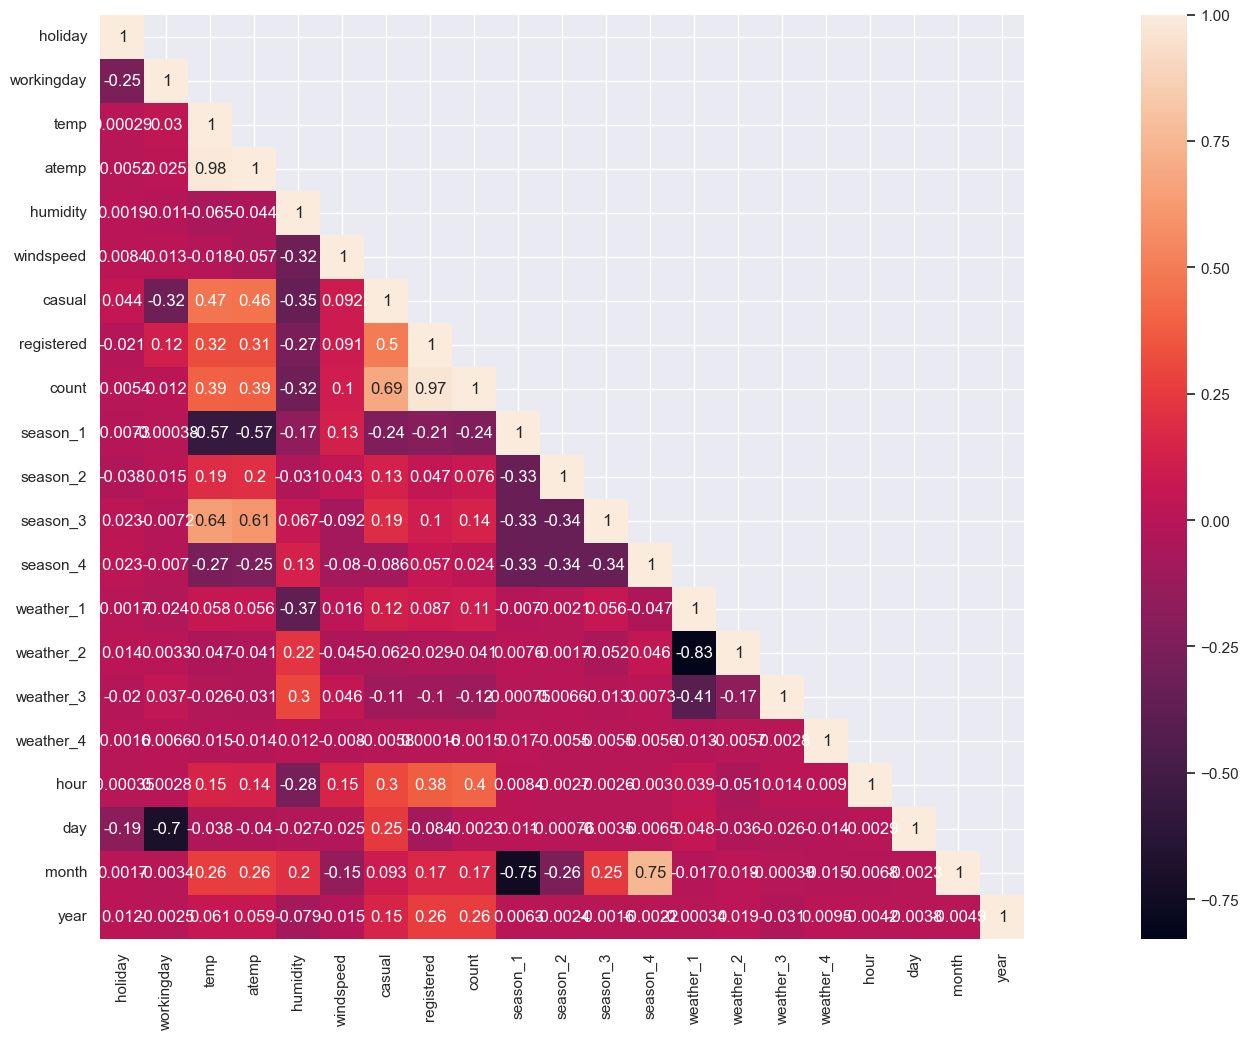

In [28]:
cor_mat= df_bike[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(
          data=cor_mat,
          mask=mask,
          square=True,
          annot=True,
          cbar=True
);

In [29]:
df_bike.drop(['casual','registered'],axis=1,inplace=True)
df_bike.head()

,holiday,workingday,temp,atemp,humidity,windspeed,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year
0,0,0,9.84,14.395,81,0.0,16,1,0,0,0,1,0,0,0,0,5,1,0
1,0,0,9.02,13.635,80,0.0,40,1,0,0,0,1,0,0,0,1,5,1,0
2,0,0,9.02,13.635,80,0.0,32,1,0,0,0,1,0,0,0,2,5,1,0
3,0,0,9.84,14.395,75,0.0,13,1,0,0,0,1,0,0,0,3,5,1,0
4,0,0,9.84,14.395,75,0.0,1,1,0,0,0,1,0,0,0,4,5,1,0


NOW LET SEE HOW COUNT VARIES WITH DIFFERENT FEATURES.

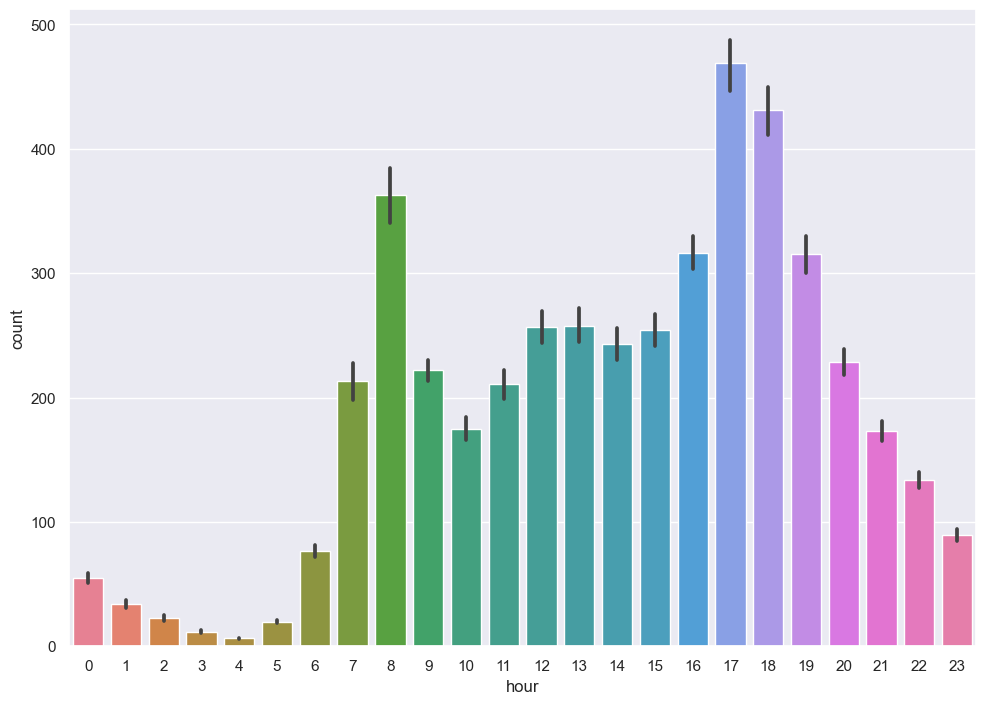

In [30]:
# with hour.
sns.barplot(
          x='hour',
          y='count',
          data=df_bike,
          palette='husl'
);
#note that the highest demand is in hours from say 7-10 and the from 15-19.
#this is bcoz in most of the metroploitan cities this is the peak office time and 
# so more people would be renting bikes. 
# this is just one of the plausible reason

<Axes: xlabel='month', ylabel='count'>

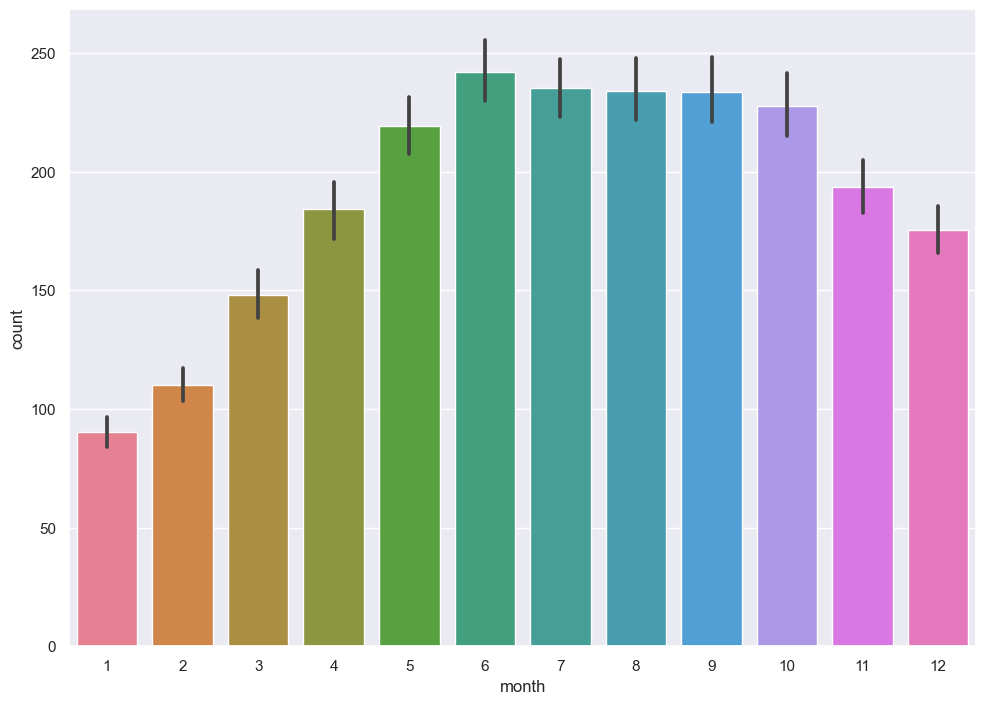

In [31]:
sns.barplot(
          x="month",
          y="count",
          data=df_bike,
          palette='husl'
)
# note that month affects season and that effects wheteher people take bike or not. 
# like climate conditions rainy,hazy etc... 

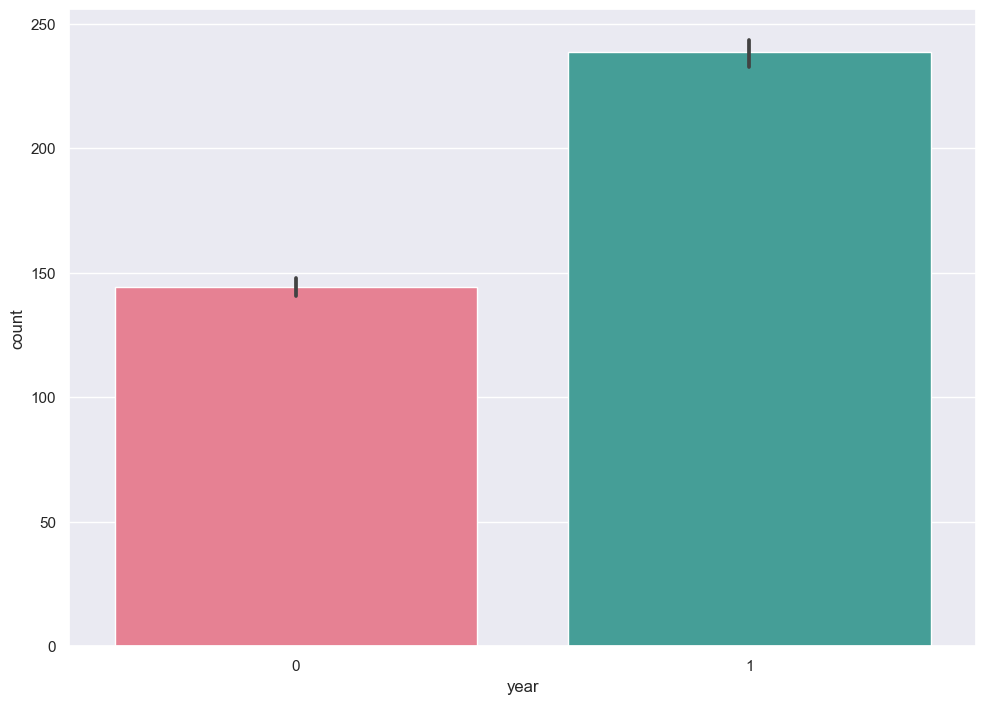

In [32]:
sns.barplot(
          x="year",
          y="count",
          data=df_bike,
          palette='husl'
);
# 0 for 2011 and 1 for 2012. 
# Hence demand has increased over the years.

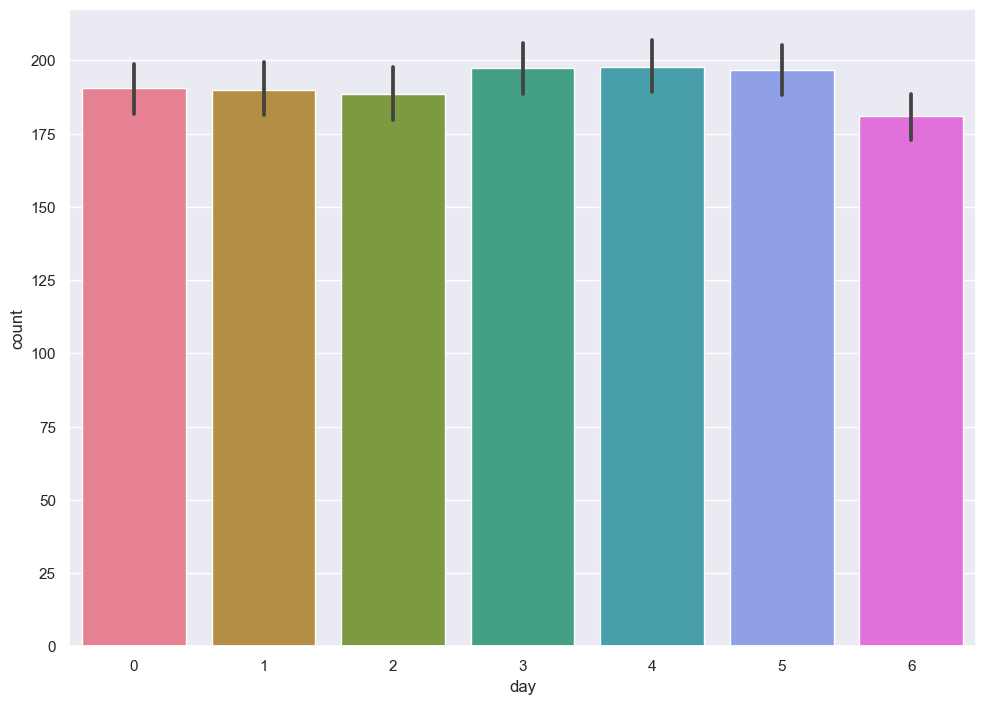

In [33]:
sns.barplot(
          x="day",
          y="count",
          data=df_bike,
          palette='husl'
);

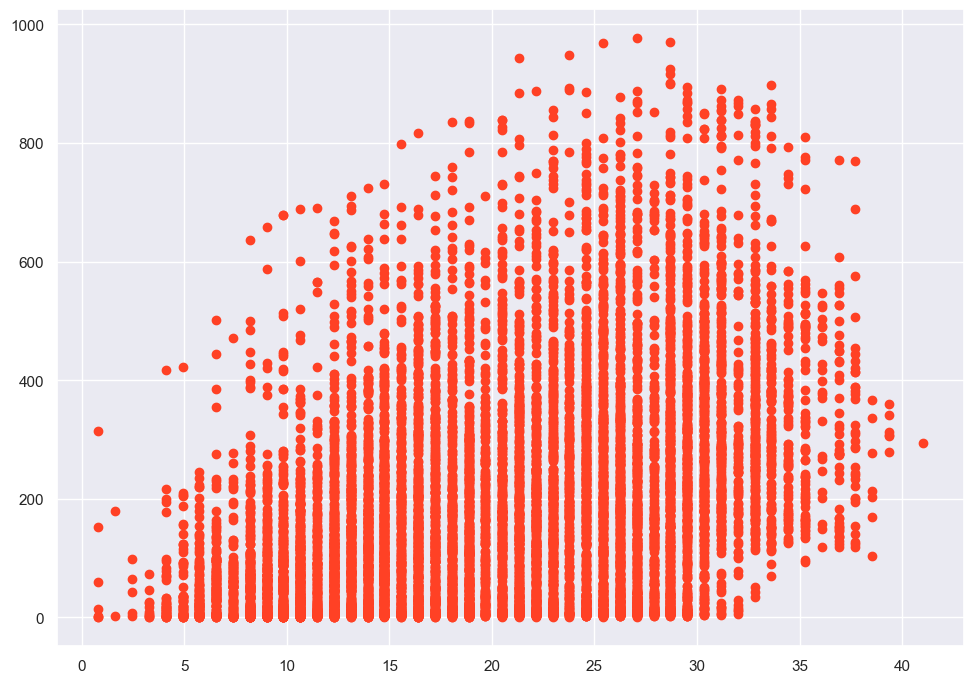

In [34]:
# for temp
plt.scatter(
          x="temp",
          y="count",
          data=df_bike,
          color='#ff4125'
);

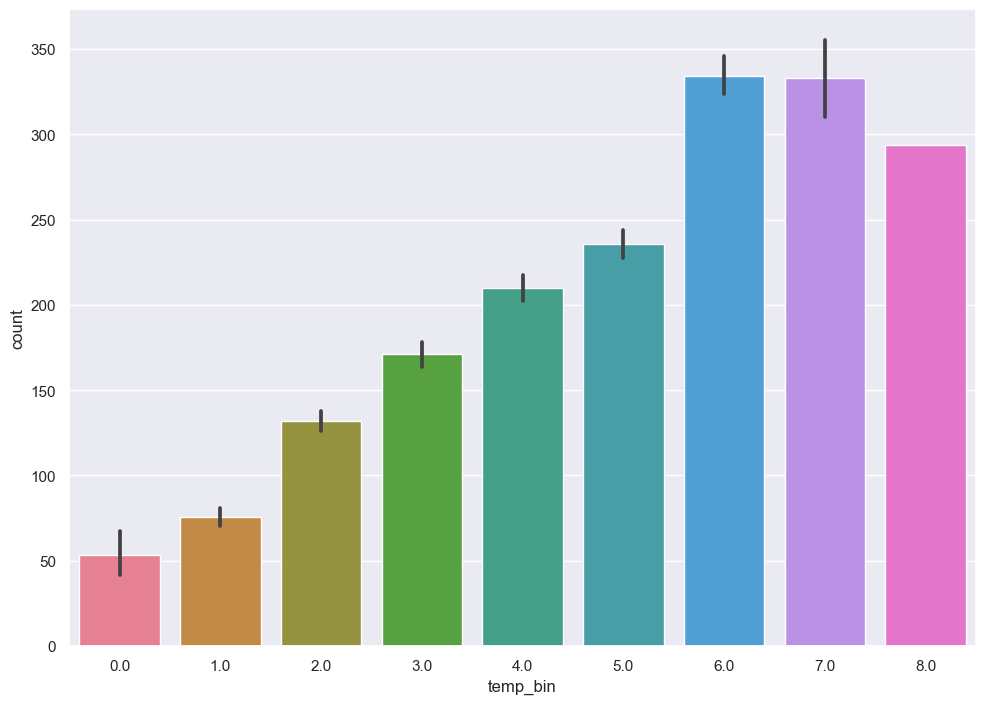

In [35]:
new_df_bike=df_bike.copy()
new_df_bike.temp.describe()
new_df_bike['temp_bin']=np.floor(new_df_bike['temp'])//5
new_df_bike['temp_bin'].unique()
# now we can visualize as follows
sns.barplot(
          x="temp_bin",
          y="count",
          data=new_df_bike,
          palette='husl'
);

now the demand is highest for bins 6 and 7 which is about tempearure 30-35(bin 6) and 35-40 (bin 7)

In [36]:
df_bike.columns.to_series().groupby(df_bike.dtypes).groups

{uint8: ['season_1', 'season_2', 'season_3', 'season_4', 'weather_1', 'weather_2', 'weather_3', 'weather_4'], int64: ['holiday', 'workingday', 'humidity', 'count', 'hour', 'day', 'month', 'year'], float64: ['temp', 'atemp', 'windspeed']}

In [37]:
df_bike.head()

,holiday,workingday,temp,atemp,humidity,windspeed,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year
0,0,0,9.84,14.395,81,0.0,16,1,0,0,0,1,0,0,0,0,5,1,0
1,0,0,9.02,13.635,80,0.0,40,1,0,0,0,1,0,0,0,1,5,1,0
2,0,0,9.02,13.635,80,0.0,32,1,0,0,0,1,0,0,0,2,5,1,0
3,0,0,9.84,14.395,75,0.0,13,1,0,0,0,1,0,0,0,3,5,1,0
4,0,0,9.84,14.395,75,0.0,1,1,0,0,0,1,0,0,0,4,5,1,0


In [38]:
#define X and y
X = df_bike.drop(["count","windspeed","atemp","temp"], axis=1)
y = np.log1p(df_bike["count"])

In [39]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

RandomForest Regression

In [40]:

models=[LinearRegression(), Ridge(), RandomForestRegressor(),SVR(),KNeighborsRegressor()]
names =['Linear Regression', 'Ridge Regresion', 'Random Forest Regressor','SVR','KNeighbors Regressor']
rmsle=[]
d={}
for model in range (len(models)):
    clf=models[model]
    clf.fit(X_train,y_train)
    test_pred=clf.predict(X_test)
    test_pred_exp = np.expm1(test_pred)
    y_test_exp = np.expm1(y_test)
    rmsle.append(np.sqrt(mean_squared_log_error(y_test_exp , test_pred_exp)))
d={'Model':names,'RMSLE':rmsle}   
rmsle_df = pd.DataFrame(d)
rmsle_df

,Model,RMSLE
0,Linear Regression,1.045450
1,Ridge Regresion,1.045453
2,Random Forest Regressor,0.329716
3,SVR,0.930330
4,KNeighbors Regressor,0.522322


In [41]:
#Let's find optimum parameters for RF model
model_rf = RandomForestRegressor(n_estimators=500, random_state=42)

params ={
          'max_depth':[4, 5, 6],
          'max_features':['auto','sqrt', 'log2']
}

In [42]:

#implement GridSearch
cv_rf_model = GridSearchCV(
          param_grid = params,
          estimator=model_rf,
          cv=5,
          #scoring = "neg_mean_squared_log_error",
          n_jobs=-1,
          verbose=1
)
cv_rf_model

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_estimators=500, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=1)

In [43]:
cv_rf_model.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


/Users/Shivani/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/Shivani/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/Shivani/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also th

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_estimators=500, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=1)

In [44]:
print('Best Score:', cv_rf_model.best_score_)

Best Score: 0.8695784914293189


In [45]:
print('Parameters:', cv_rf_model.best_params_)

Parameters: {'max_depth': 6, 'max_features': 'auto'}


Tuned

In [46]:

model_rf = RandomForestRegressor(n_estimators=500, random_state=42)
params ={'max_depth':[ 6],
         'max_features':['auto']}

In [47]:

#implement Grid Search
cv_rf_model = GridSearchCV(
          model_rf,
          param_grid = params ,
          cv=5,
          verbose = 1, 
          scoring = "neg_mean_squared_log_error",
          n_jobs=-1
          )


In [48]:

# Fit cv to the training set: 
cv_rf_model.fit(X_train, y_train)


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/Shivani/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/Shivani/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/Shivani/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also th

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_estimators=500, random_state=42),
             n_jobs=-1, param_grid={'max_depth': [6], 'max_features': ['auto']},
             scoring='neg_mean_squared_log_error', verbose=1)

In [49]:
y_pred = cv_rf_model.predict(X_test)


In [50]:
y_pred_log = np.expm1(y_pred)


In [51]:
y_test_log = np.expm1(y_test)

In [52]:
score = np.sqrt(mean_squared_log_error(y_test_log,y_pred_log))
print("Negative mean squared log error: {}".format(score))

Negative mean squared log error: 0.5192779853015994


Save to csv

In [53]:
test_kag.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [54]:
pred=cv_rf_model.predict(df_test_kag.drop(['datetime','atemp','temp','windspeed'],axis=1))
d={'datetime':test_kag['datetime'],'count':pred}
ans=pd.DataFrame(d)
ans.to_csv('bike_answer.csv',index=False) # saving to a csv file for predictions on kaggle.
print("Your submission was successfully saved!")

Your submission was successfully saved!


### Kaggle_score_submission = 3.08921